# Intro to NLP - First Mandatory Task 


Welcome to the first mandatory task of the 2020 Tryolabs Intro to NLP course. Please read carefully all the instructions before starting.

1. This task has a weight of **30% of the total course marks** for those of you that are getting university credit and you are **required** to submit a solution. 


2. You will need to submit a **single .ipynb** file with the solution, you can download the file you are working on directly from colab from the *file* menu on the top left.  


3. We encourage you to explore and experiment with as many things as you want for this lab, and don't hesistate to reach out to any of the lectureres, or general dicussion channels in slack with questions. When doing so please **avoid sharing specific implementation, code or issues particular to your solution**.


4. The submission will be done through here: **[Submissions Link](https://forms.gle/KZxWfJoKrL2qLSin9)**. You will need to be logged in with google to submit and this only allows **one response per person**, so only submit when you are happy with your results. Remeber to run the notebook before submitting and upload the file with the run results.


5. Data: For this task you will need the following dataset files: **[Train Data](https://drive.google.com/file/d/1_0-UGJyhsLbShLBrci2ro76-OgWbJaf9/view?usp=sharing)** **[Test Data](https://drive.google.com/file/d/1v5AZvV_2Ug-2diflyaeRDCbX7C_WWotI/view?usp=sharing)**.
Both are .csv files that you will need to **uplodad to your personal drive under a data folder in the root**.


6. **DEADLINE**: This task is due on **09/10/2020 until 23:59** after this no more submissions will be accepted.


7. **Grading**: We will look at how you solve the task at hand as a whole, **including the level of understanding shown in comments and markdown sections, so don't forget to explain your solution!** We want you to achive the highest possible scores you can but, won't penalize you for not having the best solution possible. That being said, it should be pretty straightforward to get accuracy scores over 70% and 60% for train and test. So solutions failing to pass those thresholds will be penalized. Experimentation and different approaches will also be taken into consideration, so explore as much as you want.


8. To foster competition and reward you for trying your best, the best solution (in terms of test accuracy, cleanliness, and other factors) will win a Tryolabs kit with gifts.


The specific details of the problem to solve are below:

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Amazon product reviews

For this task we want to classify amazon reviews into helpful or not. We provided a dataset with three columns: `reviewText`, `summary` and `target`. 

The task is as follows: using only ONE text column (either `reviewText` or `summary`) predict the taget label (1 for useful, 0 for useless). The problem should be addressed using only traditional NLP techniques seen so far (NN classifiers are not allowed, anything else is; so feel free to google around and try to get the best possible performance).

You should report your performance on the separate test set provided (you **CAN'T** use it to train your models).

***
Note: We strongly recommend starting with the `summary` text column and only attempting to work with `reviewText` once you have a working solution you are happy with.


# Upload data to your google drive

We shared two files with you:


*   train_data.csv
*   test_data.csv

Please upload them to your personal google drive under a `data` folder. This notebook will later read that data from that location and use it for this task.

## Task 1: Load & Explore data

Load the datasets from drive and perform some exploratory analysis. We recommend leaving the dataframe loading on a cell of its own (as it can take some time), and perfoming all anylisis on different cells below.


In [4]:
import pandas as pd
from google.colab import drive
drive.mount("/content/drive")

train_df = pd.read_csv("/content/drive/My Drive/data/train_data.csv")
test_df = pd.read_csv("/content/drive/My Drive/data/test_data.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We can execute an `info` call to see the fields for the dataframe and know with which kind of data we are deailing with

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38496 entries, 0 to 38495
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewText  38496 non-null  object
 1   summary     38496 non-null  object
 2   target      38496 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 902.4+ KB


It seems that we have a `target` field that may be the target to predict for our classification algorithm.

A `describe` call to that column will give us an overview of the values in that field.  

In [ ]:
train_df['target'].describe()

count    38496.000000
mean         0.658822
std          0.474111
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: target, dtype: float64

It seems that the `target` only contains `0` and `1` values and most of the data has a value of `1`.

In [ ]:
train_df['target'].unique()

array([1, 0])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f93ef3860>]],
      dtype=object)

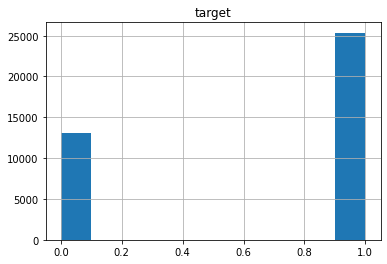

In [ ]:
train_df.hist()

We can set this variable as an `object` type to treat as a categorical variable with pandas.

Know that we have the value as a `object` we can execute a describe to get a better understanding of the data we have at our dispossal.

In [ ]:
train_df.describe()

,target
count,38496.000000
mean,0.658822
std,0.474111
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
train_df.select_dtypes(['object']).describe()

,reviewText,summary
count,38496,38496
unique,38495,36371
top,Jet Grind Radio is yet another impressively cr...,Disappointing
freq,2,52


As shown before the `top` value for our target is `1`, we have `25362`.


In [ ]:
train_df[train_df['target'] == 1].count()

reviewText    25362
summary       25362
target        25362
dtype: int64

In [ ]:
train_df[train_df['target'] == 0].count()

reviewText    13134
summary       13134
target        13134
dtype: int64

In [ ]:
train_df[train_df['target'] == 1].head(10)

,reviewText,summary,target
0,I AM STAIONED IN AFGHANISTAN RIGHT NOW WE DONT...,Disgusted soldier out of money and time,1
6,"On the drawing board, GTA San Andreas sounds p...",Somewhat disappointing.,1
8,I know I'm going to get roasted for that title...,Best pro football game you're going to have th...,1
9,If you have a high-end system to play it on. U...,Four and a half stars. Oblivion will blow you ...,1
10,The first time Final Fantasy V was releasd in ...,Not the Best in the Series but Still Good,1
11,Pros:- Incredible environmental and sound effe...,Great survival-horror title,1
14,From now on if buy a PC Download Game from Ama...,Dragon Age Origins Will NOT Install!,1
17,its strange....rise of nations improved on eve...,oldies are the goodies,1
18,I have purchased Madden every year for AT LEAS...,One Step Forward Two Steps Back,1
19,Lots of fun & I'm glad got it. It comes with ...,Awesome workout,1


In [ ]:
train_df[train_df['target'] == 0].head(10)

,reviewText,summary,target
1,Having enjoyed Sonic Advance I was eager to ge...,"A ton of fun, but very, very short.",0
2,"Like many that come before me, I too played th...",Once again and alpha player,0
3,"This device is extremely delicate, featuring a...","disposable controller, only $54.99!",0
4,"This game has terrible graphics, terrible soun...",How can you go backwards??????,0
5,"Another review, another game played and beat.....",The Truth about Silent Hill 3...,0
7,We now have a choice to make as a gaming commu...,My computer?,0
12,Let me start off by saying i do have Demons So...,This is NOT an RPG game...!!!,0
13,I'm giving this a somewhat low rating for a fe...,"It's a remote... nothing special here, but nee...",0
15,"I originally bought this game prior to BFBC3, ...","Honestly, this game was a waste of money...",0
16,"Ten years ago I bought the first Doom, played ...",Simply Fantastic,0


It seems that the `summary` column is more related to the `target` label but because of the difference in quantity it may be difficult to know.

In [ ]:
train_df[train_df['target'] == 0][['summary', 'target']].sample(20)

,summary,target
34517,"It's okay, but it could have been better.",0
29756,"Paid for an Xbox 360 game, got an Xbox 1 game ...",0
22834,Extremely Overrated,0
20232,What is this garbage!!!,0
34202,It looks pretty good.,0
23862,"Rinse, Repeat, Recycle",0
2213,Overpriced - Overhyped and Needlessly Limited,0
23161,Dead Or Alive 5: Does It Deliver?,0
24206,I'm Batman,0
25386,Something for Wii or game-console remake defin...,0


In [ ]:
train_df[train_df['target'] == 1][['summary', 'target']].sample(20)

,summary,target
38183,An almost-great game with a fatal flaw,1
17037,Impressive graphics; basic gameplay,1
3503,Pokes in a few new features.,1
36693,Nier is a quirky innovative hit!,1
33347,Weakest Story of the Trilogy,1
29482,Great Family-Friendly Puzzle Fun,1
235,"One of, if not the, best comic licensed 16-bit...",1
37875,The Little Engine That Could...,1
31626,Fantastic Sound Quality - Advantage for Sounds...,1
35996,"Great, but repetitive",1


Grabbing a random sample gives the impression that `1` is for negative and `0` for positive/neutral reviews.

Because we are still unsure we are going to create two new dataframes:

- `train_one_df`
- `train_zero_df`

In [ ]:
train_one_df = train_df[train_df['target'] == 1].copy()
train_zero_df = train_df[train_df['target'] == 0].copy()

In [ ]:
train_one_df.count()

reviewText    25362
summary       25362
target        25362
dtype: int64

In [ ]:
train_zero_df.count()

reviewText    13134
summary       13134
target        13134
dtype: int64

In [ ]:
(train_zero_df.count() / train_df.count()) * 100

reviewText    34.11783
summary       34.11783
target        34.11783
dtype: float64

In [ ]:
(train_one_df.count() / train_df.count()) * 100

reviewText    65.88217
summary       65.88217
target        65.88217
dtype: float64

It seems that for our training dataset we don't have to deal with imbalance, or at least we assume that the current proportion are ok for the sklearn algorithms. 

In [ ]:
train_summary_df = train_df['summary'].copy()

In [ ]:
train_y_df = train_df['target'].copy()

### Extracting features from the `summary` column.

We need to apply some pre-processing to our `summary` values to generate useful features from it, remove stopwords and stemming.

In [5]:
import nltk
nltk.download('stopwords') # downloading stopword data, using ignore_stopwords with snowball throw a LookupError without this.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
from nltk.stem.snowball import EnglishStemmer

In [7]:
snowball_stemmer = EnglishStemmer()

why snowball? https://stackoverflow.com/questions/10554052/what-are-the-major-differences-and-benefits-of-porter-and-lancaster-stemming-alg

The first choice was to use PorterStemmer since most books and resources make a reference to it, some do not and that lead to search for which to use.

Besides what's described in the SO answer we have the following from the [snowball official documentation](https://snowballstem.org/):

> We also aim to conflate words with the same meaning, rather than all words with a common linguistic root (so awe and awful don't have the same stem).. If you want to always reduce words to a root form and/or get a root form which is itself a word then Snowball's stemming algorithms likely aren't the right answer. 

So it seems that snowball is a improved version of Porter and it will not remove words that may be useful for sentiment analysis.

In [8]:
from nltk.corpus import stopwords

Removing stopwords.

In [9]:
en_stopwords = set(stopwords.words('english'))

#### Tokenizing

nltk already provides a module `tokenize` to tokenize texts, in the chapter three of the book they mention two functions `word_tokenizer`and `regexp_tokenize` but in the summary they mention a howto guide which in turn mentions the `tokenize` module.

The `tokenize` module documentation includes a description of a `TweetTokenizer` which seems to take modern? expressions used in social media.

It may be a good idea to test some of them to have a better sense of how each one works.

In [10]:
from nltk.tokenize import TweetTokenizer

In [11]:
from typing import * # better autocompletion from collab, maybe, first time trying.

In [12]:
def tokenize_summary(summary: str, tknzr=TweetTokenizer()) -> List[str]:
  tokens = tknzr.tokenize(summary.lower())
  words = [w for w in tokens if w not in en_stopwords]
  return [ snowball_stemmer.stem(w) for w in words]

Testing our `tokenize_summary` with different tokenizers.

In [14]:
samples_to_test_tokenizers = train_df['summary'].sample(15)

In [15]:
samples_to_test_tokenizers

36555             uhhhh, really? what's with all the hype?
34123    DS Lite InvisaShields By Pelican - Great Scree...
30886                                          frustrating
28277                              Beautiful and Haunting.
26558            This game is broken.  Avoid at all costs.
2323                             Turn-Based is Not Dead!!!
8905                    "One Sentence Review" Of Watchdogs
20174    This is a Must-Play Package for Any God of War...
10121                                        Great bundle.
14924                  So disappointed...so repetitious...
16438       5 hours long. 5 hours long? Yes, 5 hours long.
27487                             Must buy for car lovers!
20190    Stick with BF3 and BFBC2 if you liked the cont...
37190          GT6:  Becoming the "Madden" of racing games
544                                      Surprisingly good
Name: summary, dtype: object

##### Testing with twitter tokenizer

In [16]:
[tokenize_summary(summary=summary) for summary in samples_to_test_tokenizers]

[['uhhhh', ',', 'realli', '?', 'what', 'hype', '?'],
 ['ds',
  'lite',
  'invisashield',
  'pelican',
  '-',
  'great',
  'screen',
  'protector',
  'nds',
  '!',
  '!',
  '!'],
 ['frustrat'],
 ['beauti', 'haunt', '.'],
 ['game', 'broken', '.', 'avoid', 'cost', '.'],
 ['turn-bas', 'dead', '!', '!', '!'],
 ['"', 'one', 'sentenc', 'review', '"', 'watchdog'],
 ['must-play', 'packag', 'god', 'war', 'fan'],
 ['great', 'bundl', '.'],
 ['disappoint', '...', 'repetiti', '...'],
 ['5',
  'hour',
  'long',
  '.',
  '5',
  'hour',
  'long',
  '?',
  'yes',
  ',',
  '5',
  'hour',
  'long',
  '.'],
 ['must', 'buy', 'car', 'lover', '!'],
 ['stick', 'bf3', 'bfbc', '2', 'like', 'control', '.'],
 ['gt6', ':', 'becom', '"', 'madden', '"', 'race', 'game'],
 ['surpris', 'good']]

Let's try with TreebankWordTokenizer [which is the one used by](https://www.nltk.org/api/nltk.tokenize.html#module-nltk.tokenize) the `word_tokenize` method.

In [17]:
from nltk.tokenize import TreebankWordTokenizer

In [18]:
[tokenize_summary(summary=summary, tknzr=TreebankWordTokenizer()) for summary in samples_to_test_tokenizers]

[['uhhhh', ',', 'realli', '?', "'s", 'hype', '?'],
 ['ds',
  'lite',
  'invisashield',
  'pelican',
  '-',
  'great',
  'screen',
  'protector',
  'nds',
  '!',
  '!',
  '!',
  '!'],
 ['frustrat'],
 ['beauti', 'haunt', '.'],
 ['game', 'broken.', 'avoid', 'cost', '.'],
 ['turn-bas', 'dead', '!', '!', '!'],
 ['``', 'one', 'sentenc', 'review', "''", 'watchdog'],
 ['must-play', 'packag', 'god', 'war', 'fan'],
 ['great', 'bundl', '.'],
 ['disappoint', '...', 'repetiti', '...'],
 ['5',
  'hour',
  'long.',
  '5',
  'hour',
  'long',
  '?',
  'yes',
  ',',
  '5',
  'hour',
  'long',
  '.'],
 ['must', 'buy', 'car', 'lover', '!'],
 ['stick', 'bf3', 'bfbc2', 'like', 'control', '.'],
 ['gt6', ':', 'becom', '``', 'madden', "''", 'race', 'game'],
 ['surpris', 'good']]

Both tokenizer leave commas and other punctuation some differences from the samples, for example with `I've` Twitter tokenizers seems to grab `i'v` and the Treebank grabs `ve`, but it seems that otherwise because our samples don't use modern expressions they are pretty much similar.

#### Transforming our training summary dataset

Now that we have a tokenizer method we can apply that to all records in our training dataset or rather extract features from our text using the [`sklearn.feature_extraction.text`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_extraction.text) module.

In [ ]:
train_summary_df.apply(lambda summary: tokenize_summary(summary=summary))

0               [disgust, soldier, money, time]
1                    [ton, fun, ,, ,, short, .]
2                               [alpha, player]
3             [dispos, control, ,, $, 54.99, !]
4                       [go, backward, ?, ?, ?]
                          ...                  
38491                              [done, !, !]
38492             [great, think, could, better]
38493                              [go, motion]
38494                              [close, ...]
38495    [yay, !, let, kill, nazi, !, . . ., !]
Name: summary, Length: 38496, dtype: object

Getting the target and values from the testing dataset.

In [19]:
test_summary_df, test_y_df = test_df['summary'].copy(), test_df['target'].copy()

Following the [sklearn documentation](https://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting) we can start building our pipeline to process our classifier using the `summary` column.

## Task 2: Train a classifier 

Train any classifier of your liking (no NN classifiers though!) and measure its performance on the train set.

In order to do this, you will probably need to clean the text (based on the analysis you performed) to remove any unwanted words (Like we did in the previous labs). 

Once you've done the cleaning you will need to convert each review into a vector (e.g. using bag-of-words or a smiliar approach) and train a classifier on them.

For the classifier, anything in sklearn could do the trick so feel free to explore around and try different things. Remember to `fit` the classifier using only the train data. 

Once the classifier is trained compute the predictions (calling the `predict` method) on the data you just trained to see what your model learned.


### Building the Pipeline for summary

Our first grid search pipeline is going to make use of `TfidfVectorizer` and (as expected) a `RandomForestClassifier`

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
from sklearn.pipeline import Pipeline

In [23]:
from sklearn.decomposition import TruncatedSVD

In [24]:
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier

In [ ]:
# this is partly inspired if not not copy pasted from https://scikit-learn.org/stable/auto_examples/model_selection/grid_search_text_feature_extraction.html#sphx-glr-auto-examples-model-selection-grid-search-text-feature-extraction-py

# We know we can use GridSearch to find the best performing classifier for a given set of hyper-parameters.

rf_pipeline = Pipeline([
    ('tfidf_vec', TfidfVectorizer(tokenizer=tokenize_summary, norm='l2', sublinear_tf=True)),
    ('svd', TruncatedSVD(n_components=2)),
    ('normalizer', Normalizer()),
    ('clf', RandomForestClassifier(random_state=13, n_jobs=-1)),
])
n_components=10
rf_parameters = {
    'tfidf_vec__ngram_range': ((1, 2), (1, 3)), # bigrams, trigrams and unigrams
    # 'tfidf_vec__norm': ('l2', 'l1'),
    # 'tfidf_vec__max_df': (0.5, 0.75, 1.0),
    # 'tfidf_vec__max_features': (None, 5000, 10000, 50000),
    # 'tfidf_vec__strip_accents': (None, 'unicode')
    # 'tfidf_vec__use_idf': (True, False),
    #'tfidf_vec__sublinear_tf': (True, False),
    # 'clf__n_estimators': (500, 1000)
}




In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
from sklearn.metrics import make_scorer, f1_score

In [ ]:
rf_grid_search = GridSearchCV(rf_pipeline, rf_parameters, n_jobs=-1, verbose=1, scoring=make_scorer(f1_score), cv=2)

## Task 3: Predict 

Finally, report the performance of your classifier on the unseen test set.


#### Random Forest Predict

In [ ]:
rf_grid_search.fit(train_summary_df, train_y_df.astype('int'))

Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

In [ ]:
rf_grid_search.best_estimator_.get_params()

In [ ]:
rf_predictions = rf_grid_search.predict(test_summary_df)

In [27]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(test_y_df, rf_predictions)

In [28]:
from sklearn.metrics import plot_confusion_matrix

In [29]:
import matplotlib.pyplot as plt 
from sklearn.metrics import plot_confusion_matrix

In [ ]:
plot_confusion_matrix(rf_grid_search, test_summary_df, test_y_df)  
plt.show()  

AttributeError: ignored

In [30]:
from sklearn.metrics import plot_precision_recall_curve


In [ ]:
plot_precision_recall_curve(rf_grid_search, test_summary_df, test_y_df)  # doctest: +SKIP


In [32]:
from sklearn.metrics import precision_recall_curve

In [ ]:
precision_recall_curve(test_y_df, rf_predictions)

In [33]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(test_y_df, rf_predictions)

In [34]:
from sklearn.metrics import plot_roc_curve


In [ ]:
plot_roc_curve(rf_grid_search, test_summary_df, test_y_df)

### PreProcessing Pipeline

It seems that a RandomForest is not a good fit for this task, it's just a little bit better than flipping a coin.


In [35]:
# should define preprocessing parameters
grid_parameters = {
    'tfidf_vec__ngram_range': ((1, 2), (1, 3)), # bigrams, trigrams and unigrams
    # 'tfidf_vec__norm': ('l2', 'l1'),
    'tfidf_vec__max_df': (0.5, 0.75, 1.0),
    # 'tfidf_vec__max_features': (None, 5000, 10000, 50000),
    # 'tfidf_vec__strip_accents': (None, 'unicode')
    # 'tfidf_vec__use_idf': (True, False),
    #'tfidf_vec__sublinear_tf': (True, False),
    # 'clf__n_estimators': (500, 1000)
}

### SGD with Summary

In [ ]:
sgd_pipeline = Pipeline([
    ('tfidf_vec', TfidfVectorizer(tokenizer=tokenize_summary, norm='l2', sublinear_tf=True)),
    ('svd', TruncatedSVD(n_components=10)),
    ('normalizer', Normalizer()),
    ('clf', SGDClassifier(loss="hinge", penalty="l2", max_iter=5))
])

In [ ]:
sgd_grid_search = GridSearchCV(sgd_pipeline, grid_parameters, n_jobs=-1, verbose=1, scoring=make_scorer(f1_score), cv=2)

In [ ]:
sgd_grid_search.fit(train_summary_df, train_y_df.astype('int'))

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   45.9s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


GridSearchCV(cv=2, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidf_vec',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                     

In [36]:
def plot_scores(clf, test_X, test_y):
  plot_confusion_matrix(clf, test_X, test_y)
  plt.show()
  plot_precision_recall_curve(clf, test_X, test_y)
  plt.show()
  plot_roc_curve(clf, test_X, test_y)
  plt.show()

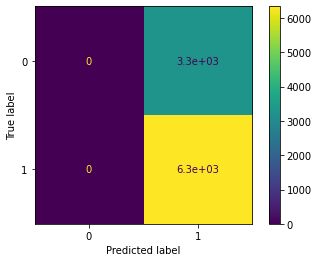

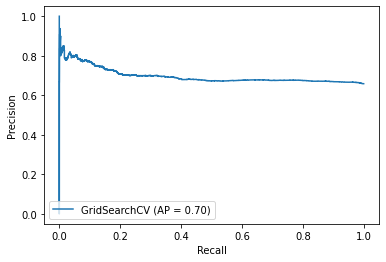

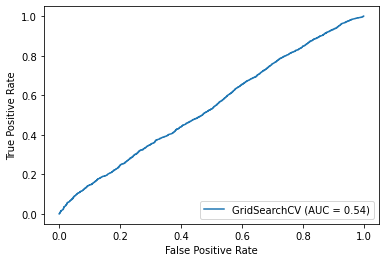

In [ ]:
plot_scores(sgd_grid_search, test_summary_df, test_y_df)

In [28]:
from sklearn.metrics import precision_score, recall_score


In [37]:
def print_scores(true_y, predicted_y):
  print(f"f1 Score: {f1_score(true_y, predicted_y)}")
  print(f"accuracy score: {accuracy_score(true_y, predicted_y)}")
  print(f"precision score: {precision_score(true_y, predicted_y)}")
  print(f"recall_score: {recall_score(true_y, predicted_y)}")

In [ ]:
print_scores(test_y_df, sgd_grid_search.predict(test_summary_df))

f1 Score: 0.794287146078677
accuracy score: 0.6587697423108895
precision score: 0.6587697423108895
recall_score: 1.0


### NaiveBayes (Bernoulli) with Summary

In [30]:
from sklearn.naive_bayes import BernoulliNB


In [ ]:
nb_pipeline = Pipeline([
    ('tfidf_vec', TfidfVectorizer(tokenizer=tokenize_summary, norm='l2', sublinear_tf=True)),
    ('svd', TruncatedSVD(n_components=10)),
    ('normalizer', Normalizer()),
    ('clf', BernoulliNB())
])

In [ ]:
nb_grid_search = GridSearchCV(nb_pipeline, grid_parameters, n_jobs=-1, verbose=1, scoring=make_scorer(f1_score), cv=5)

In [ ]:
nb_grid_search.fit(train_summary_df, train_y_df.astype('int'))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidf_vec',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                     

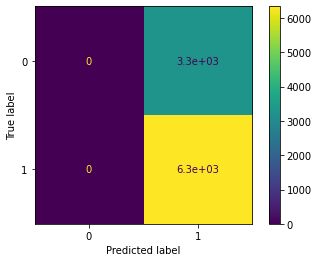

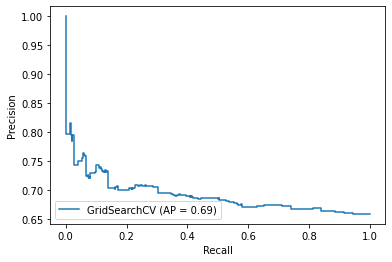

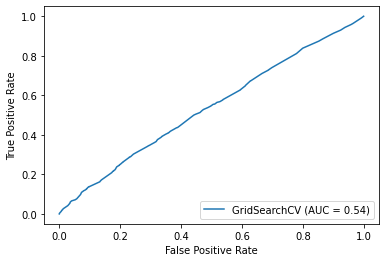

In [ ]:
plot_scores(nb_grid_search, test_summary_df, test_y_df)

In [ ]:
print_scores(test_y_df, nb_grid_search.predict(test_summary_df))

f1 Score: 0.794287146078677
accuracy score: 0.6587697423108895
precision score: 0.6587697423108895
recall_score: 1.0


In [31]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(test_y_df, nb_grid_search.predict(test_summary_df)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3284
           1       0.66      1.00      0.79      6340

    accuracy                           0.66      9624
   macro avg       0.33      0.50      0.40      9624
weighted avg       0.43      0.66      0.52      9624



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Training with reviewText

In [ ]:
train_reviewText_df = train_df['reviewText'].copy()

### SGD

In [ ]:
sgd_grid_search.fit(train_reviewText_df, train_y_df.astype('int'))

In [ ]:
plot_scores(sgd_grid_search, test_df['reviewText'], test_y_df)

In [ ]:
print(classification_report(test_y_df, sgd_grid_search.predict(test_df['reviewText'])))

In [ ]:
print_scores(test_y_df, nb_grid_search.predict(test_df['reviewText']))

It kind of makes sense for the algorithms to fail much more for `0` if we take a sample of 10:

In [ ]:
pd.get_option('display.max_columns')

In [ ]:
pd.get_option('display.max_colwidth')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
test_df[test_df['target'] == 0][['reviewText', 'target']].sample(10)

In [ ]:
pd.set_option('display.max_colwidth', 50)

But it also seem that a lot of this review use words like `not`, `no` which are removed by the `nltk stopwords` list that we are currently using, would the results improve if we search and use different a list?

We've already read something [related to this in the `sklearn` documentation ](https://scikit-learn.org/stable/modules/feature_extraction.html#using-stop-words) 

> There are several known issues in our provided ‘english’ stop word list. It does not aim to be a general, ‘one-size-fits-all’ solution as some tasks may require a more custom solution. See [NQY18] for more details.

> Please take care in choosing a stop word list. Popular stop word lists may include words that are highly informative to some tasks, such as computer.


But the paper mentioned in there doesn't seem to provide a list of alternatives.

The [first result](https://www.quora.com/Is-there-a-stop-word-list-specifically-designed-for-sentiment-analysis?share=1) for the [search "stopwords for sentiment analysis"](https://duckduckgo.com/?t=ffab&q=stopwords+for+sentiment+analysis&atb=v202-1&ia=web) has post with people recommending:


- Not using stop words...
- Generating a [custom list of stop words](http://kavita-ganesan.com/tips-for-constructing-custom-stop-word-lists/#.W5lir5NKhQI).
- Links to two papers that explain how to build sentiment analysis.


One of the papers mentioned has a section with the name ["Stopword removal methods"](http://www.lrec-conf.org/proceedings/lrec2014/pdf/292_Paper.pdf) which mentions multiple approach to generate stopwords.

#### Not using stopwords

Just out of curiosity, we are going to use a tokenizer function that uses no stopwords.

In [38]:
def tokenize_summary_no_stopwords(summary: str, tknzr=TweetTokenizer()) -> List[str]:
  tokens = tknzr.tokenize(summary.lower())
  # words = [w for w in tokens if w not in en_stopwords]
  return [ snowball_stemmer.stem(w) for w in tokens]

##### Bernoulli Naive Bayes pipeline with no stop words.

In [ ]:
nb_nostop_pipeline = Pipeline([
    ('tfidf_vec', TfidfVectorizer(tokenizer=tokenize_summary_no_stopwords, norm='l2', sublinear_tf=True, max_df=0.5, stop_words='english', use_idf=True)),
    ('svd', TruncatedSVD(n_components=10)),
    ('normalizer', Normalizer()),
    ('clf', BernoulliNB())
])

In [ ]:
nb_nostop_grid_search = GridSearchCV(nb_nostop_pipeline, grid_parameters, n_jobs=-1, verbose=1, scoring=make_scorer(f1_score), cv=5)

In [ ]:
nb_nostop_grid_search.fit(train_summary_df, train_y_df.astype('int'))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.3min finished
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft',

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidf_vec',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=0.5,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                     

In [ ]:
print_scores(test_y_df, nb_nostop_grid_search.predict(test_df['summary']))

f1 Score: 0.794287146078677
accuracy score: 0.6587697423108895
precision score: 0.6587697423108895
recall_score: 1.0


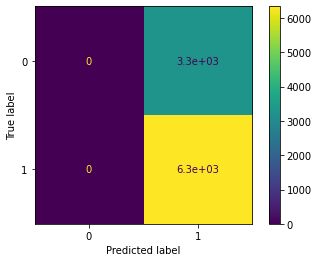

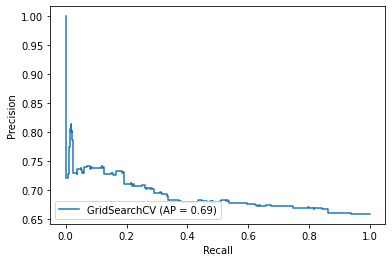

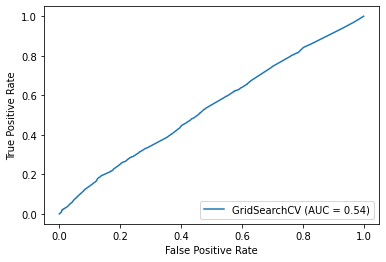

In [ ]:
plot_scores(nb_nostop_grid_search, test_df['summary'], test_y_df)

Naive Bayes did worse... there also more false negative and false positives.

##### Using SGD with no stop words

In [39]:
def metrics_for_classifier(clf, train_X, train_y, test_X, test_y, tokenizer=tokenize_summary, parameters=grid_parameters):
  pipeline = Pipeline([
    ('tfidf_vec', TfidfVectorizer(tokenizer=tokenizer, norm='l2', sublinear_tf=True)),
    ('svd', TruncatedSVD(n_components=100)),
    ('normalizer', Normalizer()),
    ('clf', clf)])
  clf_grid = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring=make_scorer(f1_score), cv=5)
  clf_grid.fit(train_X, train_y)
  print_scores(test_y, clf_grid.predict(test_X))
  plot_scores(clf_grid, test_X, test_y)
  return (pipeline, clf_grid)

f1 Score: 0.794287146078677
accuracy score: 0.6587697423108895
precision score: 0.6587697423108895
recall_score: 1.0


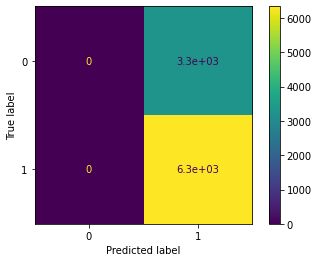

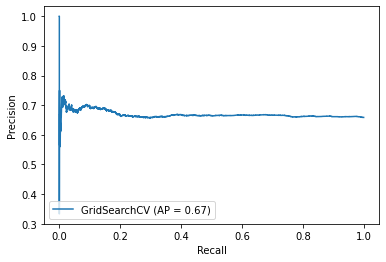

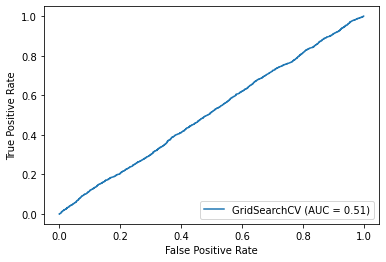

In [ ]:
pipeline, sgdc_nostop_clf = metrics_for_classifier(SGDClassifier(), train_summary_df, train_y_df.astype('int'), test_df['summary'], test_df['target'])


### SGD no stop words in tokenizer with no punctuation.

In [40]:
from nltk.tokenize import RegexpTokenizer

In [41]:
rt = RegexpTokenizer('[a-zA-Z0-9\.\!]+')

In [42]:
def regextokenizer(sentence):
  tokens = rt.tokenize(sentence)
  return [snowball_stemmer.stem(t.lower()) for t in tokens]

f1 Score: 0.794287146078677
accuracy score: 0.6587697423108895
precision score: 0.6587697423108895
recall_score: 1.0


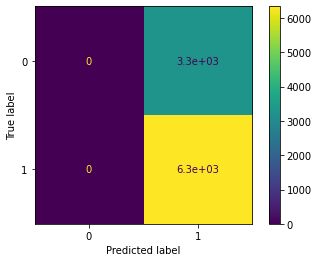

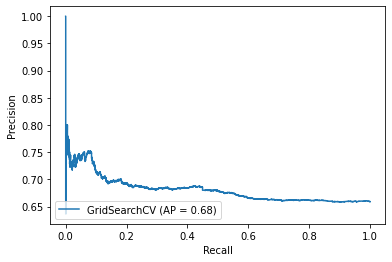

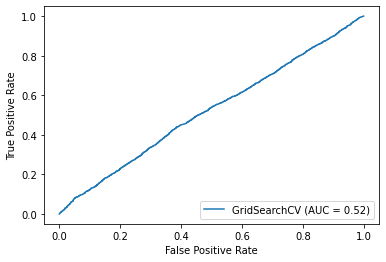

In [56]:
pipeline, sgdclf = metrics_for_classifier(SGDClassifier(), train_df['summary'], train_df['target'], test_df['summary'], test_df['target'], tokenizer=regextokenizer)

In [63]:
pd.DataFrame(sgdclf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_tfidf_vec__max_df,param_tfidf_vec__ngram_range,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.995180,0.088286,1.200302,0.063606,0.5,"(1, 2)","{'tfidf_vec__max_df': 0.5, 'tfidf_vec__ngram_r...",0.794332,0.794394,0.7943,0.7943,0.7943,0.794325,0.000037,1
1,7.242828,0.132724,1.201549,0.104078,0.5,"(1, 3)","{'tfidf_vec__max_df': 0.5, 'tfidf_vec__ngram_r...",0.794332,0.794394,0.7943,0.7943,0.7943,0.794325,0.000037,1
2,5.799702,0.078704,1.155035,0.068643,0.75,"(1, 2)","{'tfidf_vec__max_df': 0.75, 'tfidf_vec__ngram_...",0.794332,0.794394,0.7943,0.7943,0.7943,0.794325,0.000037,1
3,6.983950,0.077466,1.243527,0.017471,0.75,"(1, 3)","{'tfidf_vec__max_df': 0.75, 'tfidf_vec__ngram_...",0.794332,0.794394,0.7943,0.7943,0.7943,0.794325,0.000037,1
4,5.976939,0.367632,1.243885,0.070503,1,"(1, 2)","{'tfidf_vec__max_df': 1.0, 'tfidf_vec__ngram_r...",0.794332,0.794394,0.7943,0.7943,0.7943,0.794325,0.000037,1
5,6.745943,0.674559,1.072056,0.201485,1,"(1, 3)","{'tfidf_vec__max_df': 1.0, 'tfidf_vec__ngram_r...",0.794332,0.794394,0.7943,0.7943,0.7943,0.794325,0.000037,1


In [65]:
best_pipeline_sgdclf = sgdclf.best_estimator_

### SVM no stop words in tokenizer with no punctuation.

In the [Sentiment Symposium Tutorial: Classifiers](http://sentiment.christopherpotts.net/classifiers.html) it's mentioned that SVMs are a good contender for MaxEnt.

> Support Vector Machines (likely to be competitive with MaxEnt; see Pang, Lee, and Vaithyanathan 2002).

This is relevant because the paper mentions that MaxEnt is a good model for the "sentiment analysis problem".

And going through the [sklearn's SVM page](https://scikit-learn.org/stable/modules/svm.html) the description of this algorithms mentions:

> - Effective in high dimensional spaces.
> - Still effective in cases where number of dimensions is greater than the number of samples.



In [43]:
def metrics_for_classifier_nogrid(clf, train_X, train_y, test_X, test_y, tokenizer=tokenize_summary, parameters=grid_parameters):
  pipeline = Pipeline([
    ('tfidf_vec', best_pipeline_sgdclf['tfidf_vec']),
    ('svd', best_pipeline_sgdclf['svd']),
    ('normalizer', Normalizer()),
    ('clf', clf)])
  pipeline.fit(train_X, train_y)
  # clf_grid = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=0, scoring=make_scorer(f1_score), cv=5)
  # clf_grid.fit(train_X, train_y)
  print_scores(test_y, pipeline.predict(test_X))
  plot_scores(pipeline, test_X, test_y)
  return (pipeline, pipeline)

In [44]:
from sklearn import svm

f1 Score: 0.794287146078677
accuracy score: 0.6587697423108895
precision score: 0.6587697423108895
recall_score: 1.0


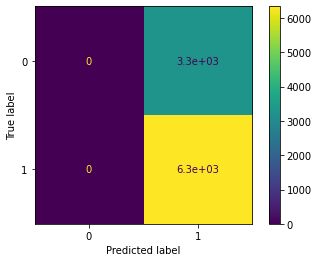

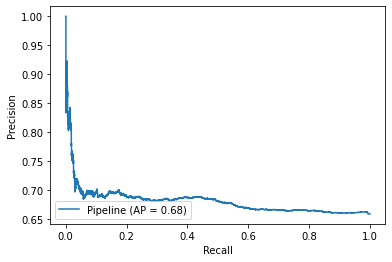

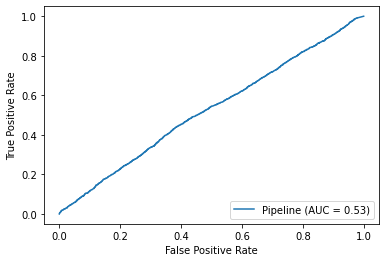

(Pipeline(memory=None,
          steps=[('tfidf_vec',
                  TfidfVectorizer(analyzer='word', binary=False,
                                  decode_error='strict',
                                  dtype=<class 'numpy.float64'>,
                                  encoding='utf-8', input='content',
                                  lowercase=True, max_df=0.5, max_features=None,
                                  min_df=1, ngram_range=(1, 2), norm='l2',
                                  preprocessor=None, smooth_idf=True,
                                  stop_words=None, strip_accents=None,
                                  sublinear_tf=True,
                                  token_patter...
                 ('svd',
                  TruncatedSVD(algorithm='randomized', n_components=2, n_iter=5,
                               random_state=None, tol=0.0)),
                 ('normalizer', Normalizer(copy=True, norm='l2')),
                 ('clf',
                  LinearSVC(C=1

In [72]:
metrics_for_classifier_nogrid(svm.LinearSVC(), train_df['summary'], train_df['target'], test_df['summary'], test_df['target'], tokenizer=regextokenizer)

It seems svm.SVC [may not be the right algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) from this problem:

> For large datasets consider using sklearn.svm.LinearSVC or sklearn.linear_model.SGDClassifier instead

The [paper](http://www.lrec-conf.org/proceedings/lrec2014/pdf/292_Paper.pdf) referenced in the first answer on quora gives a good rundown on how this task should be approached.

They mentioned methods for stopwords, scoring methods, and models to use.

On models they make use of:

> , Maximum Entropy(MaxEnt) and Naive Bayes (NB) from Mallet.

While sklearn has naive bayes it doesn't seem to have a model for Maximum Entropy, maybe is an old model or probably just fitted for a couple of tasks, however nltk do contain  both models: https://www.nltk.org/howto/classify.html

The problem is that they have to be adapted to use with the pipeline but it should be worth trying.

In one part **Methods based on Zipf’s Law(Z-Methods)** the paper mentions:

>  removing most frequent words (TF-High) and removing words thatoccur once, i.e. singleton words (TF1). We also consider re-moving words with low inverse document frequency (IDF).To choose the number of words in the stoplists generated bythe aforementioned methods, we first rank the terms in eachdataset based on their frequencies (or the inverse documentfrequencies in the IDF method).


That prompt me to look at the nltk documentation or google "zipf nltk" and that bring nothing or at least not a straighfoward result.

However this page: https://www.nltk.org/howto/collocations.html mentions _Mutual Information_.

Looking at the `sklearn TfidfVectorizer` documentation, since we are talking about _Tfidf_, it seems the instance of the algorithm has a `get_stopwords()` method, but going to the documentation it seems that it just returns the ginve stopwords or the english stopwords list.

## Trying nltk Maximum Entropy and Naive Bayes 

We have seen both algorithms being mentioned in multiple articles related to sentiment analysis:

- http://www.lrec-conf.org/proceedings/lrec2014/pdf/292_Paper.pdf
- http://sentiment.christopherpotts.net/classifiers.html
- https://www.nltk.org/howto/sentiment.html
- https://www.nltk.org/howto/classify.html


And while is not still clear how to actually clasify with nltk the second link gives a pretty good insight and the nltk documentation explains what is necessary

In [49]:
import nltk
from nltk.tokenize import TweetTokenizer

In [50]:
import random
from nltk.corpus import brown

In [51]:
tweet_tokenizer = TweetTokenizer(strip_handles=True)

In [55]:
nltk_train_tokens = [tweet_tokenizer.tokenize(summary.lower()) for summary in train_df['summary']]

Selecting a stemmer.

http://sentiment.christopherpotts.net/stemming.html

It seems that the best option is PorterStemmer since Snowball is a more recent version we should be safe using it.


In [56]:
nltk_train_stem = list(map(lambda s: [snowball_stemmer.stem(word) for word in s], nltk_train_tokens))

Linguistic Structure

http://sentiment.christopherpotts.net/lingstruc.html

> identifying semantic groupings and relationships that are relevant for sentiment.

Apparently we can add a marking to each token:

> Definition: Negation marking

> Append a _NEG suffix to every word appearing between a negation and a clause-level punctuation mark. 

They give an example with enjoy in which depending on the context, they grab the bigram for this, they mark the word with `_NEG` at the end.

> the algorithm has literally turned enjoy into two tokens: enjoy outside of the scope of negation, enjoy_NEG inside the scope of negation. Thus, we needn't stipulate a relationship between the negated and un-negated forms; the sentiment analysis system can learn how the two behave.

And it also seems this should be applied on the tokens before the stemming.


The book ["Machine Learning Algorithms"](https://www.packtpub.com/product/machine-learning-algorithms/9781785889622) makes mention of VADER a module inside nltk to do sentiment analysis, reading that and the page linked before lead to me to review the nltk's sentiment package "documentation":

- https://www.nltk.org/api/nltk.sentiment.html

Which has a utility method: `nltk.sentiment.util.mark_negation` to do what's being mentioned before.

In [53]:
from nltk.sentiment.util import mark_negation

In [36]:
mark_negation(nltk_train_tokens[0])

['disgusted', 'soldier', 'out', 'of', 'money', 'and', 'time']

In [37]:
mark_negation("i didn't NEED another wiimote ...".split())

['i', "didn't", 'NEED_NEG', 'another_NEG', 'wiimote_NEG', '..._NEG']

In [38]:
mark_negation(list(map(lambda s: [snowball_stemmer.stem(word) for word in s], ["i didn't NEED another wiimote ...".split()])))

[['i', "didn't", 'need_NEG', 'anoth_NEG', 'wiimot_NEG', '..._NEG']]

In [57]:
# Apparently the mark_negation only accepts "sentences" as arguments and we can used the stemmed 

nltk_train_tokens_neg = [mark_negation(sentence_tokenized) for sentence_tokenized in nltk_train_stem] 

nltk works diffrently apparently, it hiddens some stuff but at the same time, because of how we have learnt to use these things it seems more complicated.

Following: https://www.nltk.org/howto/sentiment.html

We can get the bigrams but nltk has methods to get a readble version or more usable version of them. 

Which means we have methods like [`bigram_collocation_feats`](https://www.nltk.org/api/nltk.sentiment.html#nltk.sentiment.sentiment_analyzer.SentimentAnalyzer.bigram_collocation_feats)


That when given a document they return a list of ["Features"](https://www.nltk.org/howto/featstruct.html) a feature is an object that nltk classifiers can use, is not a number in a matrix but an object that nltk classifiers can use.

Granted `bigram_collocation_feats` does a lot of things:

- Finds the bigrams in each document.
- Adds a frequency filter.
- And uses pointwise mutual information to add an score to each bigram.

In one the markdown cell before, I mentioned that some papers or articles make note of using `Mutual Information` the first one described its usage to remove stopwords and others to construct a new feature to the training set.

I still don't know what mutual information is

- https://www.youtube.com/watch?v=U9h1xkNELvY
- https://machinelearningmastery.com/information-gain-and-mutual-information/

But so far it seems to provide a **measure of their dependence.** and then it makes sense to have that number as a feature.

NOTE: Before starting working in the previous cell, I didn't knew nltk had a method calculate Mutual Information, let alone add that as a feature, there's a [howto page for collocations](https://www.nltk.org/howto/collocations.html) where they explain how to use it.

Apparently the `bigram_collocation_feats` just wraps the usage described in the collocations how to. 


In [58]:
from nltk.sentiment.sentiment_analyzer import SentimentAnalyzer

In [59]:
sentiment_analyzer = SentimentAnalyzer()

In [60]:
nltk_train_token_neg_bigram_feat = sentiment_analyzer.bigram_collocation_feats(nltk_train_tokens_neg,  min_freq=3, top_n=500)

In [61]:
nltk_train_token_neg_bigram_feat[:10]

[('cooki', 'cutter'),
 ('ninja_NEG', 'gaiden_NEG'),
 ('splinter_NEG', 'cell_NEG'),
 ('obscen_NEG', 'lyric_NEG'),
 ('cate', 'archer'),
 ('lm', 'punk'),
 ('sexual', 'escapad'),
 ('tomb_NEG', 'raider_NEG'),
 ('indiana', 'jone'),
 ('kung', 'fu')]

In [62]:
len(nltk_train_token_neg_bigram_feat)

500

Extracting features from bigrams.

The sentiment analyzer has methods to extract [nltk features](https://www.nltk.org/api/nltk.sentiment.html#nltk.sentiment.sentiment_analyzer.SentimentAnalyzer.add_feat_extractor) from documents.

But they first should be added as a list, like adding a `sklearn object` to a `Pipeline` is just that nltk doesn't have something similar so they rely on stuff like this, callbacks.

In [63]:
from nltk.sentiment.util import extract_bigram_feats

In [64]:
sentiment_analyzer.add_feat_extractor(extract_bigram_feats, bigrams=nltk_train_token_neg_bigram_feat)

Applying features:

- https://www.nltk.org/api/nltk.sentiment.html#nltk.sentiment.sentiment_analyzer.SentimentAnalyzer.apply_features


We can pass an argument `labeled` as `True` to the sentiment analyzer `apply_features` method so the training set has a label to pass to the predictor.

In [70]:
def nltk_process_document_for_feature(document):
  tokens = tweet_tokenizer.tokenize(document)
  return mark_negation([snowball_stemmer.stem(word) for word in tokens])

In [71]:
nltk_bigram_training_docs = [(nltk_process_document_for_feature(value[0]), value[2]) for value in train_df.values]

In [72]:
nltk_bigram_training_docs[0]

(['i',
  'am',
  'staion',
  'in',
  'afghanistan',
  'right',
  'now',
  'we',
  'dont',
  'have_NEG',
  'much_NEG',
  'for_NEG',
  'entertain_NEG',
  'so_NEG',
  'a_NEG',
  'laptop_NEG',
  'is_NEG',
  'pretti_NEG',
  'much_NEG',
  'it_NEG',
  '.',
  'i',
  'bought',
  'this',
  'game',
  'as',
  'ive',
  'been',
  'play',
  'the',
  'total',
  'war',
  'seri',
  'from',
  'the',
  'start',
  '.',
  'i',
  'havent',
  'been_NEG',
  'one_NEG',
  'to_NEG',
  'complain_NEG',
  'about_NEG',
  'drm_NEG',
  'or_NEG',
  'securum_NEG',
  'at_NEG',
  'all_NEG',
  'but_NEG',
  'this_NEG',
  'steam_NEG',
  'is_NEG',
  'ridicul_NEG',
  'i_NEG',
  'have_NEG',
  'the_NEG',
  'disk_NEG',
  'and_NEG',
  'it_NEG',
  'tell_NEG',
  'me_NEG',
  'itll_NEG',
  'be_NEG',
  'four_NEG',
  'hour_NEG',
  'to_NEG',
  'download_NEG',
  'the_NEG',
  'game_NEG',
  'from_NEG',
  'steam_NEG',
  'server_NEG',
  'i_NEG',
  'went_NEG',
  'to_NEG',
  'forum_NEG',
  'and_NEG',
  'found_NEG',
  'this_NEG',
  'fix_NEG',
  '

In [73]:
nltk_bigram_test_docs = [(nltk_process_document_for_feature(value[0]), value[2]) for value in test_df.values]

In [74]:
nltk_bigram_test_docs[0]

(['+',
  'graphic',
  '+',
  'gameplay',
  '+',
  'item',
  '+',
  'charact',
  'custom',
  '-',
  'higher',
  'difficulti',
  'are',
  'not',
  'fun_NEG',
  'at_NEG',
  'all_NEG',
  '-_NEG',
  'had_NEG',
  'my_NEG',
  'account_NEG',
  'hackedthi_NEG',
  'game_NEG',
  'start_NEG',
  'off_NEG',
  'as_NEG',
  'a_NEG',
  'ton_NEG',
  'of_NEG',
  'fun_NEG',
  'if_NEG',
  'you_NEG',
  'are_NEG',
  'into_NEG',
  'these_NEG',
  'sort_NEG',
  'of_NEG',
  'mindless_NEG',
  'click_NEG',
  'and_NEG',
  'kill_NEG',
  'and_NEG',
  'pick_NEG',
  'up_NEG',
  'item_NEG',
  'game_NEG',
  ',_NEG',
  'especi_NEG',
  'if_NEG',
  'your_NEG',
  'friend_NEG',
  'are_NEG',
  'into_NEG',
  'it_NEG',
  'also_NEG',
  '.',
  'where',
  'it',
  'valu',
  'drop',
  'off',
  'is',
  'after',
  'about',
  'the',
  '2nd',
  'or',
  '3rd',
  'playthrough',
  'and',
  'you',
  'are',
  'on',
  'the',
  'harder',
  'difficulti',
  'level',
  ',',
  'it',
  'just',
  'stop',
  'be',
  'fun',
  ',',
  'to',
  'me',
  'at',

In [75]:
nltk_bigram_training_features = sentiment_analyzer.apply_features(nltk_bigram_training_docs, labeled=True)

In [76]:
nltk_bigram_test_features = sentiment_analyzer.apply_features(nltk_bigram_test_docs, labeled=True)

In [77]:
len(nltk_bigram_training_features[0][0])

500

In [184]:
from nltk.classify import NaiveBayesClassifier

In [419]:
# nltk takes a lot to complete, it may work better with less features.

classifier = sentiment_analyzer.train(NaiveBayesClassifier.train, nltk_bigram_training_features[:200 ])

Training classifier


In [421]:
sentiment_analyzer.evaluate(nltk_bigram_test_features[:10])

Evaluating NaiveBayesClassifier results...


{'Accuracy': 0.7,
 'F-measure [0]': 0,
 'F-measure [1]': 0.823529411764706,
 'Precision [0]': 0.0,
 'Precision [1]': 0.7777777777777778,
 'Recall [0]': 0.0,
 'Recall [1]': 0.875}

In [57]:
from nltk.classify import MaxentClassifier

In [58]:
len(nltk_bigram_training_features)

38496

In [ ]:
classifier_nltk_maxent = sentiment_analyzer.train(MaxentClassifier.train, nltk_bigram_training_features[:100], max_iter=10)

Training classifier
  ==> Training (100 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.670
             2          -0.60288        0.780
             3          -0.53499        0.780
             4          -0.48579        0.780
             5          -0.44940        0.780
             6          -0.42184        0.780
             7          -0.40066        0.780
             8          -0.38426        0.780
             9          -0.37155        0.780
            10          -0.36170        0.780
            11          -0.35409        0.780
            12          -0.34823        0.780
            13          -0.34374        0.780
            14          -0.34029        0.780
            15          -0.33766        0.780
            16          -0.33565        0.780
            17          -0.33412        0.780
            18          -0.33296        0.780
            19          -0.

In [1]:
sentiment_analyzer.evaluate(nltk_bigram_test_features[:10])

NameError: ignored

NLTK classifiers are extermely slow, but the library provides a wrapper for sklearn algorithms.

- https://www.nltk.org/api/nltk.classify.html#module-nltk.classify.scikitlearn

And they mention there that LogisticRegression is equivelent to MaxEnt? Which is interesting.

In theory we can use the same features built with nltk and run those with sklearn it may be faster.



We are going to try and use sklearn with the nltk feature we have constructued.

In [79]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline


nltk_pipeline = Pipeline([('tfidf', TfidfTransformer()),
                     ('chi2', SelectKBest(chi2, k=1000)),
                     ('clf', LinearSVC())])
nltkclassif = SklearnClassifier(nltk_pipeline)

In [ ]:
classifier_nltk_sklearn = sentiment_analyzer.train(nltkclassif.train, nltk_bigram_training_features)

Training classifier


## Trying the pipeline with SVC on neg marked tokens.

In [189]:
len(nltk_train_tokens_neg)

38496

In [191]:
train_df['target'].count()

38496

In [195]:
def nltk_tokenizer_neg(document):
  tokens = tweet_tokenizer.tokenize(document)
  return mark_negation([snowball_stemmer.stem(word) for word in tokens])

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  6.8min finished


f1 Score: 0.796598247969819
accuracy score: 0.669472152950956
precision score: 0.6698569738681579
recall_score: 0.9824921135646688


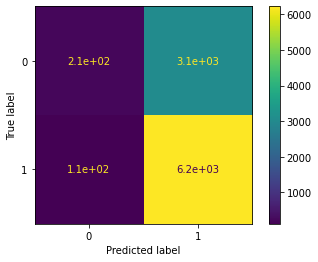

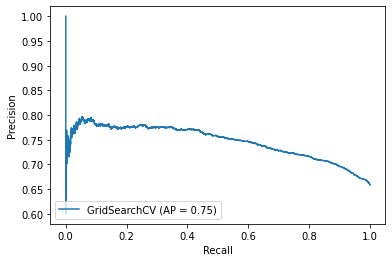

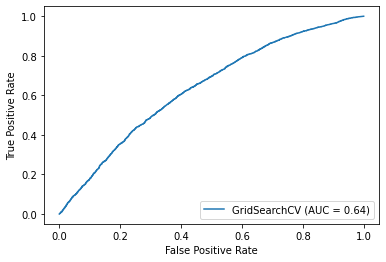

In [203]:
lnsvc_pipeline, lnsvc_grid = metrics_for_classifier(SGDClassifier(), train_df['summary'], train_df['target'], test_df['summary'], test_df['target'], tokenizer=nltk_tokenizer_neg)

In [213]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Conclusion

Our final model got a small increase to 66% accuracy. 

However according to this [document](http://sentiment.christopherpotts.net/) and others papers referenced before there is more work that we could do:

#### Removing stopwords with low Mutual information

> 

This can be achieved using a similar technique to the one we saw earlier with [bigram_collocation_feats](https://www.nltk.org/_modules/nltk/sentiment/sentiment_analyzer.html#SentimentAnalyzer.bigram_collocation_feats)

Following this guide on [collocations](https://www.nltk.org/howto/collocations.html) we can filter low scoring words using

```python
bigram_measures = nltk.collocations.BigramAssocMeasures()
pmi_stopwords = [bigram for bigram, score in bigram_finder.score_ngrams(bigram_measures.raw_freq) if score <= min_score]
```

#### Constructing a new feature for sentence polarity based on a lexicon.

- http://sentiment.christopherpotts.net/lexicons.html

I've seen this being mentioned before and seen people recommend lexicon like this one: https://github.com/7PartidasDigital/AnaText/blob/master/datos/diccionarios/sentimientos.txt for spanish tasks.

The idea here was to build a new feature using for example: [Bing Liu's Opinion Lexicon](http://sentiment.christopherpotts.net/lexicons.html#opinionlexicon)

nltk provides a module with that lexicon: 

```python
from nltk.corpus import opinion_lexicon
```

And we could have written a feature with just a number or a boolean for how much of positive words or negative words each sentence had.

As an example we can look a this code from the nltk.utils [`demo_liu_hu_lexicon`](https://www.nltk.org/_modules/nltk/sentiment/util.html#demo_liu_hu_lexicon)

An idea would have been to:

```python
positive_words = sum([ token for token in tokens if token in opinion_lexicon.positive() ])

negative_words = len([ token for token in tokens if token in opinion_lexicon.negative() ])

feature_for_sentence = ((positive_words - negative_words) / len(tokens))
```

Which of course may not work but it's a simple idea.


The same page mentions [`SentiWordNet`](http://sentiment.christopherpotts.net/lexicons.html#sentiwordnet) to get an score for each word:

- https://www.nltk.org/howto/sentiwordnet.html

```
breakdown = swn.senti_synset('breakdown.n.03')
breakdown.obj_score()
```

But that's a more complicated approach that requires the usage of wordnet.

Then it goes to describe "Vector Space" and "Context dependency" but is my understandting that word2vec, doc2vec already solves that.

We get an small increase when negating values.

## Using word2vec from genism.

- https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html

In [252]:
from gensim.models import Word2Vec

In [324]:
from gensim import utils

In [332]:
sentences = [ utils.simple_preprocess(sentence)  for sentence in train_df['summary']  ]

In [375]:
all_words = sentiment_analyzer.all_words(sentences)

In [376]:
all_words[:20]

['disgusted',
 'soldier',
 'out',
 'of',
 'money',
 'and',
 'time',
 'ton',
 'of',
 'fun',
 'but',
 'very',
 'very',
 'short',
 'once',
 'again',
 'and',
 'alpha',
 'player',
 'disposable']

In [407]:
w2v_model = Word2Vec(sentences=sentences)

In [379]:
from gensim.sklearn_api import W2VTransformer

In [380]:
from gensim.test.utils import common_texts

In [381]:
w2v_transformer = W2VTransformer()

In [382]:
w2v_transformer.fit(all_words)

W2VTransformer(alpha=0.025, batch_words=10000, cbow_mean=1,
               hashfxn=<built-in function hash>, hs=0, iter=5,
               max_vocab_size=None, min_alpha=0.0001, min_count=5, negative=5,
               null_word=0, sample=0.001, seed=1, sg=0, size=100,
               sorted_vocab=1, trim_rule=None, window=5, workers=3)

In [387]:
# the w2vtransformer doesn't work as announced.

In [409]:
word_vectors = [w2v_model[w] for w in all_words if w in w2v_model.wv.vocab.keys()]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [413]:
w2v_features_df = pd.DataFrame(dict(zip( w2v_model.wv.vocab.keys(), word_vectors ))).T

In [416]:
w2v_features_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
soldier,0.012427,-0.021040,-0.001641,-0.028124,0.030233,-0.010166,0.022986,-0.027435,-0.006615,-0.008105,-0.017471,0.015258,0.000285,-0.003479,-0.031303,0.073676,0.024596,-0.031655,-0.031987,-0.040293,0.017389,-0.075119,0.005072,-0.040154,0.021835,0.025965,0.034446,-0.063713,-0.012731,-0.020478,-0.004408,-0.014929,0.008646,-0.022559,0.013590,0.013994,-0.022726,0.018130,-0.008456,0.017550,...,-0.007904,-0.001907,0.033480,0.010799,0.013396,-0.048502,0.045226,-0.050244,-0.009734,0.029072,-0.014171,-0.018714,0.007592,0.036824,0.082005,-0.014499,-0.016591,0.003550,-0.084942,-0.015485,0.009030,0.003925,0.034572,-0.041831,-0.036921,-0.006196,0.009516,0.046354,-0.071091,-0.057025,-0.020560,0.014350,-0.051512,0.004815,0.056591,0.050714,0.016659,0.007167,0.046281,0.000462
out,0.352051,-0.391122,0.460698,-0.222140,0.203114,-0.049918,0.209294,-0.189147,0.281183,0.104738,-0.301020,0.169175,-0.253315,-0.136483,0.223068,0.895276,0.443654,-0.051548,-0.093334,0.066918,-0.013240,-0.432004,-0.169187,-0.349552,-0.132511,0.186306,0.317345,-0.672152,-0.128165,-0.209812,0.048552,-0.280919,-0.246128,-0.232318,0.113396,0.322783,-0.560143,-0.185798,-0.063533,0.109836,...,0.015992,0.038850,-0.050570,0.188559,0.286652,-0.353486,0.439853,-0.144156,-0.261601,-0.123872,-0.294641,-0.152754,0.090434,0.118564,0.882968,-0.020178,-0.385606,-0.151459,-0.643987,-0.222465,-0.214773,0.170452,0.461628,-0.115153,-0.337412,0.104112,0.010049,0.391295,-0.339840,-0.565278,-0.208570,0.104623,-0.280439,-0.155793,0.635714,0.192013,-0.232018,0.173537,-0.008878,0.149838
of,-0.335403,-0.661348,0.089818,-0.378417,0.168122,0.095871,0.622758,-0.414616,0.358626,0.049500,-0.552667,0.093107,-0.134260,-0.353742,0.243156,1.184582,0.347048,0.006669,-0.457597,0.324634,0.016670,-0.610558,-0.212803,-0.707683,-0.450853,0.422124,0.013702,-0.228918,0.042988,-0.415521,-0.406408,-0.370844,-0.291360,-0.235194,-0.178613,0.379633,-1.049007,-0.213755,-0.051010,0.148259,...,-0.256884,0.260091,-0.352341,0.151612,0.665297,0.180314,0.501016,0.228552,-0.599311,-0.030089,-0.409316,-0.428332,-0.080841,0.440615,1.206971,-0.146183,-0.644688,-0.309091,-0.985918,-0.319169,-0.177294,0.196184,0.208735,0.032147,-0.596881,-0.127575,-0.033607,0.239473,-0.361652,-0.712609,0.109810,0.082269,-0.046407,-0.581036,0.885902,0.436555,-0.050659,0.352983,-0.348653,0.286481
money,-0.074557,-0.292152,0.237001,-0.538698,0.908903,0.018853,-0.316261,-0.004417,0.534247,-0.297224,0.158222,0.145678,-0.544879,-0.196764,-0.337159,0.664456,0.665512,-0.249397,-0.237096,-0.661380,0.353811,-0.283883,-0.207156,-0.654794,0.358721,-0.110296,0.334213,-1.274185,-0.917515,0.600416,0.035046,-0.715976,-0.707295,-0.328686,-0.215749,-0.204761,-0.717951,0.679363,-0.652736,-0.142382,...,0.889552,0.032763,0.237062,-0.240390,0.212602,-0.271243,-0.013440,-0.198767,-0.174381,-0.064418,-0.239018,0.394273,-0.173166,1.081897,1.357668,-0.403669,0.135023,-0.008180,-1.212606,-0.866381,-0.528580,-1.025915,-0.192493,-0.434511,-0.546979,-0.533052,0.019967,0.351214,-0.827233,-1.057357,-0.240416,-0.004294,-0.846345,-0.416795,1.297433,0.332203,0.362050,0.508517,-0.013292,0.215092
and,-0.351039,-0.302419,-0.498572,-0.169981,0.026365,-0.087609,0.378639,-0.335920,-0.212545,-0.270010,-0.245193,0.167319,0.157615,-0.224760,-0.422875,0.608323,0.036611,-0.208644,-0.381307,-0.304663,0.378987,-0.720220,0.099631,-0.471432,0.159242,0.266375,0.084842,0.137713,0.153099,-0.245374,-0.248807,-0.122392,0.232665,-0.234681,-0.021409,0.024810,-0.333561,0.140172,0.049411,0.294465,...,-0.176653,0.059760,0.186266,0.221958,0.133088,-0.130037,0.556815,-0.179944,-0.313887,0.455108,-0.138869,-0.195615,-0.101718,0.374981,0.632420,-0.128381,-0.188105,-0.131952,-0.707197,-0.200348,0.128428,0.196758,0.190842,-0.003360,-0.252291,-0.215936,0.107745,0.050283,-0.498541,

In [417]:
w2v_sgdc_all = SGDClassifier()

In [418]:
w2v_sgdc_all.fit(w2v_features_df, train_df['target'])

ValueError: ignored